In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [11]:
from google.colab import files
secret_images = files.upload()

Saving secret_test.zip to secret_test.zip


In [13]:
images = secret_images
import zipfile
import os

zip_file_name = 'secret_test.zip'

# Create a directory to extract the images
os.makedirs('images', exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('images')

In [21]:
from PIL import Image
transform_to_tensor = transforms.Compose(
        [transforms.Resize((256,256)),
         transforms.ToTensor(),
         #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
         ])
transform = transforms.Compose(
        [transforms.Resize((256,256))])
directory = 'images/secret_test'
images = []
images_tensor = []
filenames = []
# Load and preprocess secret test images
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)
        img = Image.open(img_path)
        images.append(transform(img))
        images_tensor.append(transform_to_tensor(img))
        filenames.append(filename)

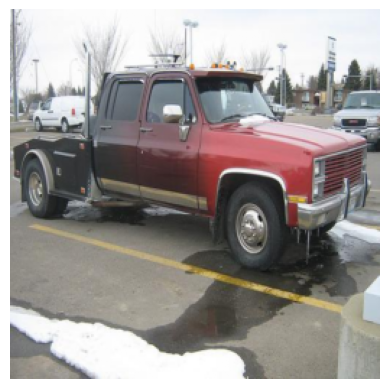

In [22]:
for img in images_tensor:
  image_np = img.permute(1, 2, 0).numpy()  # Change [C, H, W] to [H, W, C]

  # Plot the image
  plt.imshow(image_np)
  plt.axis('off')  # Turn off axis if you don't want it
  plt.show()
  break

(-0.5, 255.5, 255.5, -0.5)

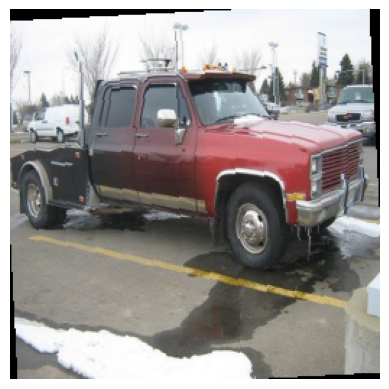

In [25]:
from torchvision.transforms import RandomAffine
image = images[0]
transform = RandomAffine(degrees=5, translate=(0.02, 0.02))
shaky_image = transform(image)
plt.imshow(shaky_image)
plt.axis('off')

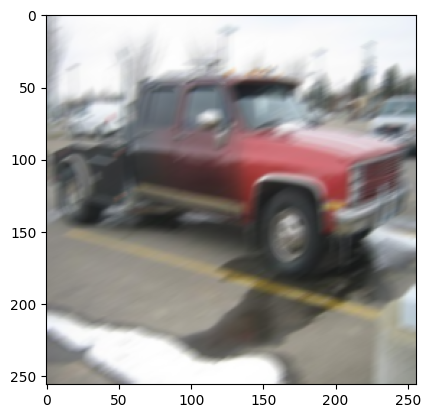

In [30]:
import cv2
import numpy as np

def apply_motion_blur(image, kernel_size=15, angle=45):
    # Create a kernel with a line (motion direction)
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = cv2.warpAffine(kernel, cv2.getRotationMatrix2D((kernel_size / 2 - 0.5, kernel_size / 2 - 0.5), angle, 1), (kernel_size, kernel_size))
    kernel = kernel / kernel_size
    # Apply the kernel to the image
    return cv2.filter2D(image, -1, kernel)

# Usage
blurred_image = apply_motion_blur(image_np, kernel_size=10, angle=30)
plt.imshow(blurred_image)

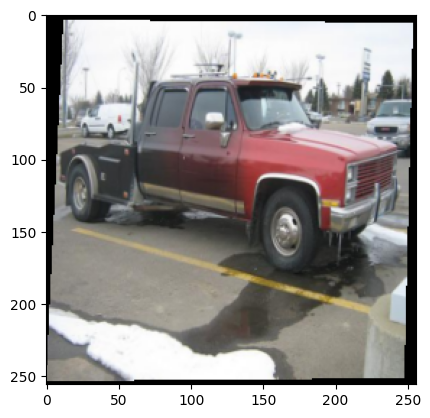

In [32]:
from torchvision.transforms import RandomPerspective

transform = RandomPerspective(distortion_scale=0.1, p=1.0)
shaky_image = transform(image)
plt.imshow(shaky_image)

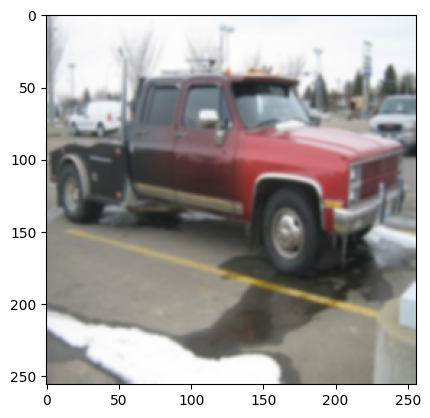

In [34]:
import cv2
blurred_image = cv2.GaussianBlur(image_np, (5, 5), 0)
plt.imshow(blurred_image)

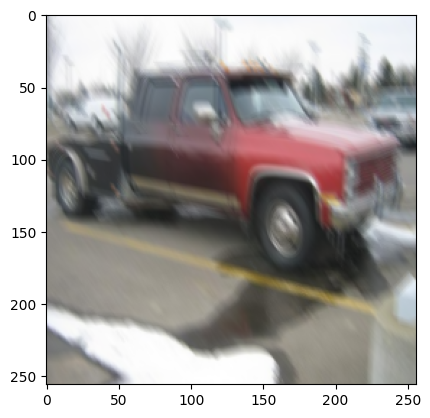

In [44]:
from albumentations import Compose, MotionBlur, ShiftScaleRotate, GaussianBlur

transform = Compose([
    MotionBlur(p=0.9, blur_limit=15),
    ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=5, p=0.5),
    #GaussianBlur(blur_limit=5, p=0.9)
])

augmented_image = transform(image=image_np)['image']
plt.imshow(augmented_image)